# Методы кластеризации

## Метод k-средних

Посмотрим на алгоритм реализации кластерного анализа методом k-средних на примере искусственных данных. Импортируем необходимые библиотеки:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Создаем случайные данные:


In [2]:
X = np.random.rand(100, 2)

Создаем объект kmeans с тремя кластерами:

In [3]:
kmeans = KMeans(n_clusters=3)

Выполняем кластеризацию:


In [4]:
kmeans.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

Получаем метки кластеров:

In [5]:
labels = kmeans.labels_


Получаем координаты центроидов:


In [6]:
centroids = kmeans.cluster_centers_

Визуализируем кластеры:

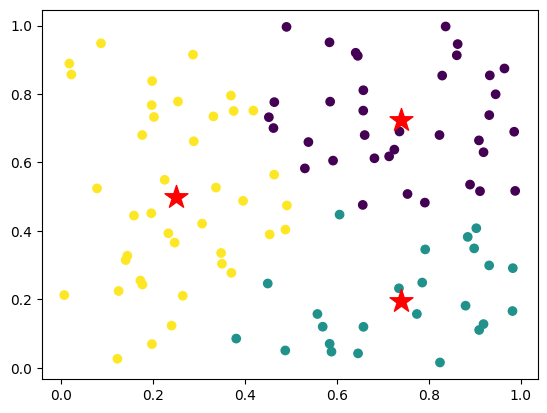

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r')
plt.show()


## Иерархическая кластеризация

Попробуем реализовать алгоритм на примере искусственных данных:

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


Создаем искусственные данные:


In [9]:
np.random.seed(123)
X = np.random.randn(10, 2)


Вычисляем матрицу расстояний между объектами:


In [10]:
Z = linkage(X, 'ward')


Строим дендрограмму:


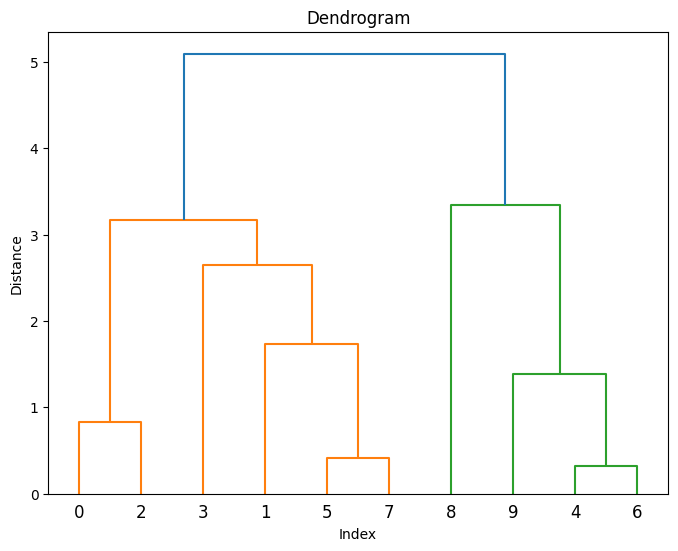

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
dendrogram(Z)
plt.title("Dendrogram")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()


## Алгоритм DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

Рассмотрим применение алгоритма на примере искусственных данных:


In [12]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


Генерируем искусственные данные:

In [13]:
X, y = make_blobs(n_samples=100, centers=3, random_state=42)


Создаем экземпляр алгоритма `dbscan`:


In [14]:
dbscan = DBSCAN(eps=2, min_samples=5)


Обучаем модель:


In [15]:
dbscan.fit(X)


DBSCAN(eps=2)

Получаем метки кластеров:


In [16]:
labels = dbscan.labels_


Визуализируем результаты:


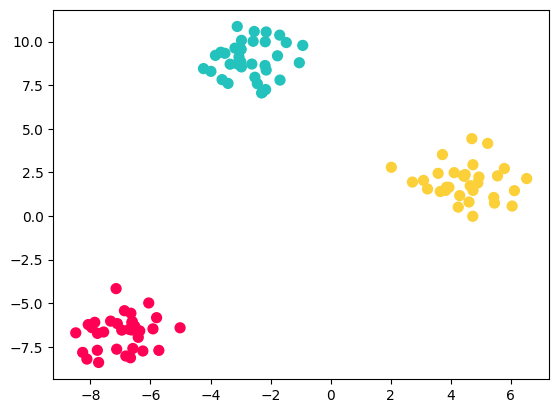

In [17]:
colors = np.array(['#FF0054', '#FBD039', '#23C2BC'])
plt.scatter(X[:, 0], X[:, 1], s=50, color=colors[labels])
plt.show()


## Оценки качества кластеризации

Рассмотрим расчет оценок качества кластеризации на примере сгенерированных данных. Мы генерируем данные о соотношении числа лайков на выборке страниц. Задача состоит в кластеризации лайков по страницам.

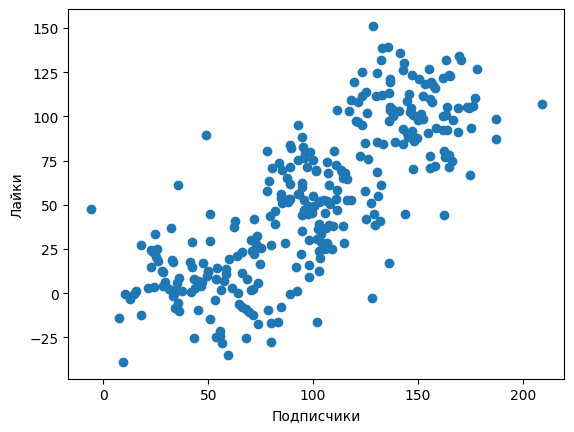

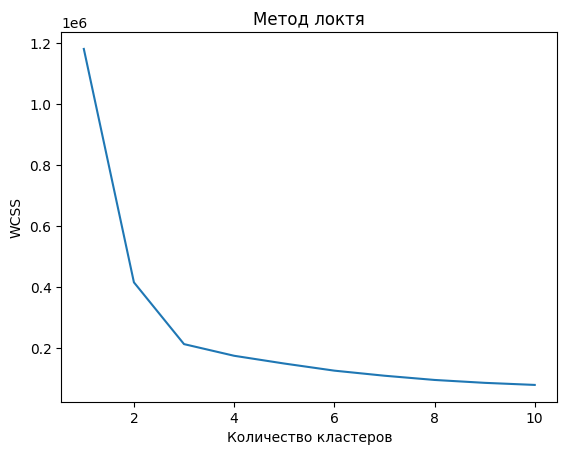

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# генерируем данные
subscribers = np.concatenate((np.random.normal(50, 20, 100),
                         	np.random.normal(100, 20, 100),
                         	np.random.normal(150, 20, 100)))

# Генерируем случайный вектор лайков
likes = np.concatenate((np.random.normal(10, 20, 100),
                   	np.random.normal(50, 20, 100),
                   	np.random.normal(100, 20, 100)))

# Визуализируем данные
plt.scatter(subscribers, likes)
plt.xlabel('Подписчики')
plt.ylabel('Лайки')
plt.show()
X = np.column_stack((likes, subscribers))

# расчет методом локтя
wcss = []
for i in range(1, 11):
   kmeans = KMeans(n_clusters=i,
init='k-means++',
max_iter=300, n_init=10, random_state=0)
   kmeans.fit(X)
   wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()


Далее применим рассмотренные ранее алгоритмы кластеризации:


In [19]:
# K-Means
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
kmeans_silhouette = silhouette_score(X, kmeans.labels_)
kmeans_calinski_harabasz = calinski_harabasz_score(X, kmeans.labels_)
kmeans_davies_bouldin = davies_bouldin_score(X, kmeans.labels_)

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3).fit(X)
hierarchical_silhouette = silhouette_score(X, hierarchical.labels_)
hierarchical_calinski_harabasz = calinski_harabasz_score(X, hierarchical.labels_)
hierarchical_davies_bouldin = davies_bouldin_score(X, hierarchical.labels_)

# DBSCAN
dbscan = DBSCAN(eps=10, min_samples=10).fit(X)
dbscan_silhouette = silhouette_score(X, dbscan.labels_)
dbscan_calinski_harabasz = calinski_harabasz_score(X, dbscan.labels_)
dbscan_davies_bouldin = davies_bouldin_score(X, dbscan.labels_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Для каждого из алгоритмов визуализируем исходную кластеризацию, чтобы сравнить, как были идентифицированы классы загруженных объектов.


K-средних:


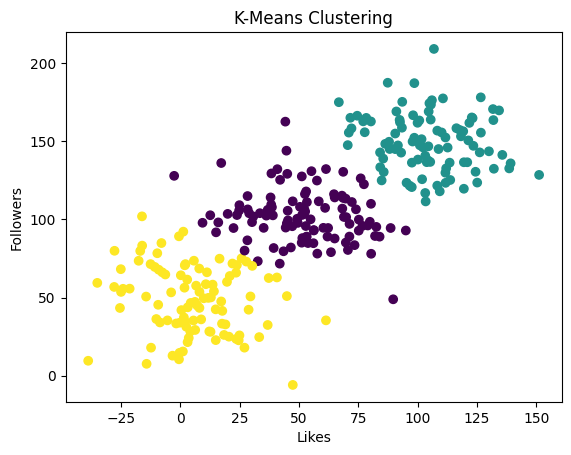

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.title("K-Means Clustering")
plt.xlabel("Likes")
plt.ylabel("Followers")
plt.show()


Иерархическая кластеризация:


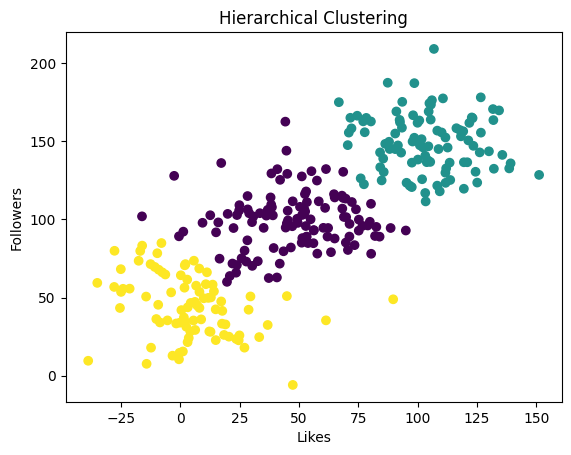

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=hierarchical.labels_)
plt.title("Hierarchical Clustering")
plt.xlabel("Likes")
plt.ylabel("Followers")
plt.show()


Алгоритм DBSCAN:


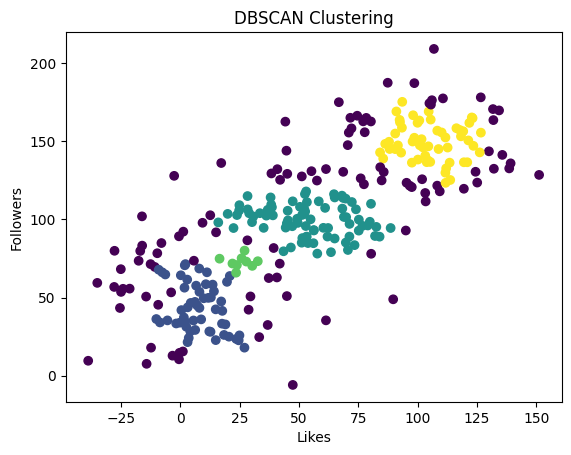

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_)
plt.title("DBSCAN Clustering")
plt.xlabel("Likes")
plt.ylabel("Followers")
plt.show()


# Методы понижения размерности

## Метод главных компонент (Principal Component Analysis)

Рассмотрим применение PCA на примере датасета рака груди. Датасет содержит информацию о множестве свойств клеток, в том числе раковая она или нет:


In [23]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


Загружаем данные Breast Cancer Wisconsin:


In [24]:
breast_cancer = load_breast_cancer()


Нормализуем данные:


In [25]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(breast_cancer.data)


Применяем метод главных компонент (PCA):


In [26]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)


Визуализируем данные:


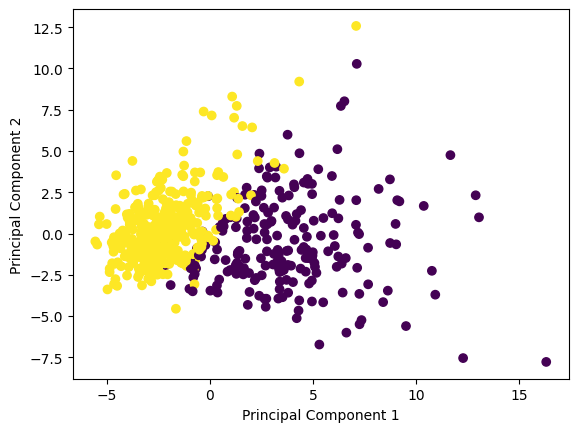

In [27]:
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=breast_cancer.target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Рассчитываем факторные нагрузки:


In [28]:
Vt = pca.components_
factor_loadings = Vt.T * np.sqrt(pca.explained_variance_)


Строим график факторных нагрузок. На графике красным цветом обозначены факторные нагрузки всех факторов первой компоненты, синим — для второй компоненты.


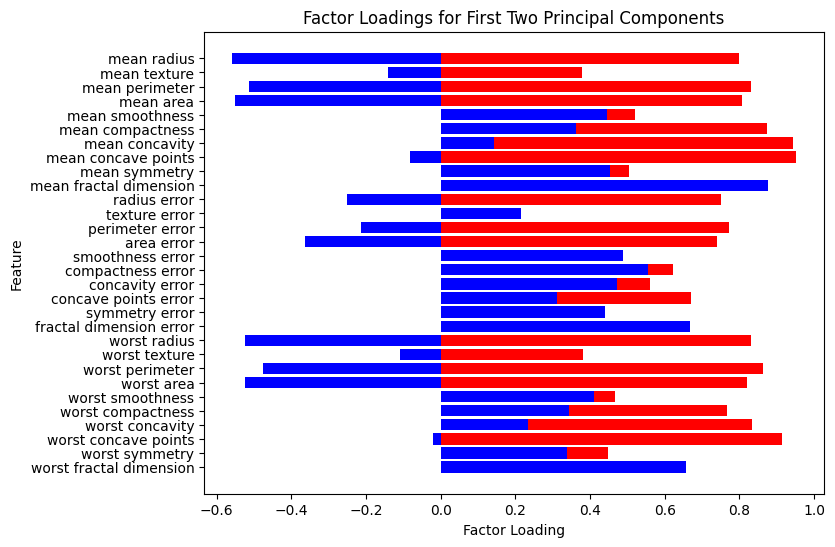

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(range(factor_loadings.shape[0]), factor_loadings[:, 0], color='r')
ax.barh(range(factor_loadings.shape[0]), factor_loadings[:, 1], color='b')
ax.set_yticks(range(factor_loadings.shape[0]))
ax.set_yticklabels(list(breast_cancer.feature_names))
ax.invert_yaxis()
ax.set_xlabel('Factor Loading')
ax.set_ylabel('Feature')
ax.set_title('Factor Loadings for First Two Principal Components')
plt.show()


## Многомерное шкалирование t-SNE

Рассмотрим пример с данными по доброкачественности или злокачественности клеток:


In [30]:
from sklearn.manifold import TSNE


Получаем матрицу признаков и соответствующих меток классов:


In [31]:
X = breast_cancer.data
y = breast_cancer.target


Применяем алгоритм t-SNE для снижения размерности данных до двух:


In [32]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)


Строим диаграммы рассеяния:


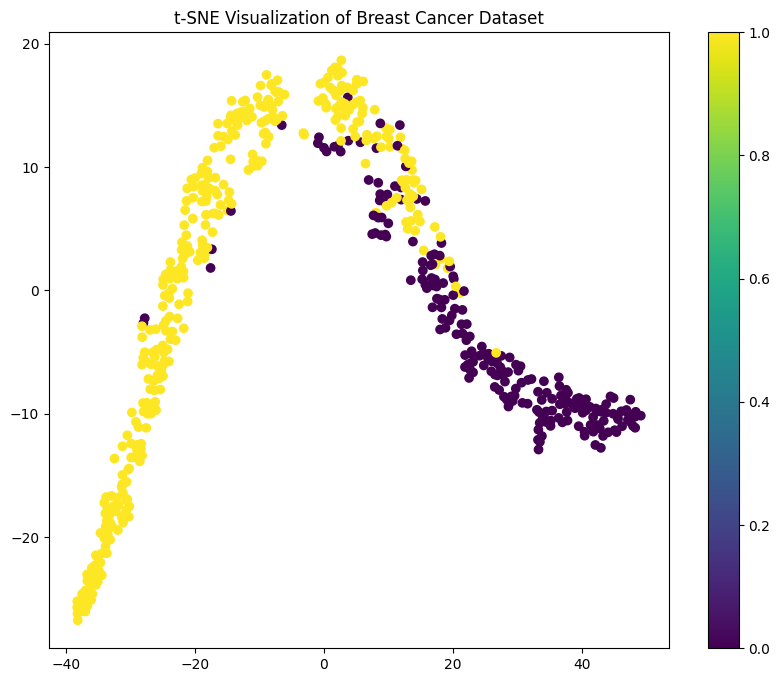

In [33]:
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.colorbar()
plt.title('t-SNE Visualization of Breast Cancer Dataset')
plt.show()


Применяем алгоритм t-SNE для снижения размерности данных до трех:


In [34]:
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X)


Строим диаграммы рассеяния в трех измерениях:


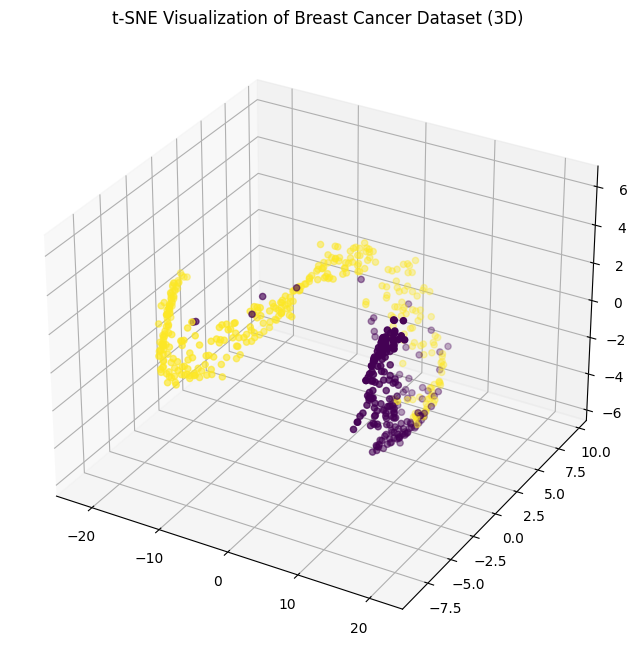

In [35]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=y, cmap='viridis')
ax.set_title('t-SNE Visualization of Breast Cancer Dataset (3D)')
plt.show()


# Рекомендательные системы

## Методы с матричными разложениями

Рассмотрим составление рекомендаций на примере матрицы рейтингов фильмов:


In [36]:
import numpy as np
from scipy.sparse.linalg import svds


Исходная матрица рейтингов:


In [37]:
ratings = np.array([[5, 3, 0, 1],
               	[4, 0, 0, 1],
               	[1, 1, 0, 5],
               	[1, 0, 0, 4],
               	[0, 1, 5, 4]]).astype(float)

Выполняем SVD для матрицы рейтингов:


In [38]:
U, S, Vt = svds(ratings, k=2)


Собираем матрицу S в диагональную матрицу:


In [39]:
S_diag = np.diag(S)


Вычисляем предсказанные рейтинги:


In [40]:
predicted_ratings = np.dot(np.dot(U, S_diag), Vt)


Выводим исходную и предсказанную матрицу рейтингов:


In [41]:
print("Исходная матрица рейтингов:")
print(ratings)
print("\nПредсказанная матрица рейтингов:")
print(predicted_ratings)


Исходная матрица рейтингов:
[[5. 3. 0. 1.]
 [4. 0. 0. 1.]
 [1. 1. 0. 5.]
 [1. 0. 0. 4.]
 [0. 1. 5. 4.]]

Предсказанная матрица рейтингов:
[[ 5.13406479  1.90612125 -0.72165061  1.5611261 ]
 [ 3.43308995  1.28075331 -0.45629689  1.08967559]
 [ 1.54866643  1.0449763   1.78873709  3.96755551]
 [ 1.17598269  0.80359806  1.40136891  3.08786154]
 [-0.44866693  0.5443561   3.09799526  5.15263893]]


Отображаем исходную матрицу рейтингов:


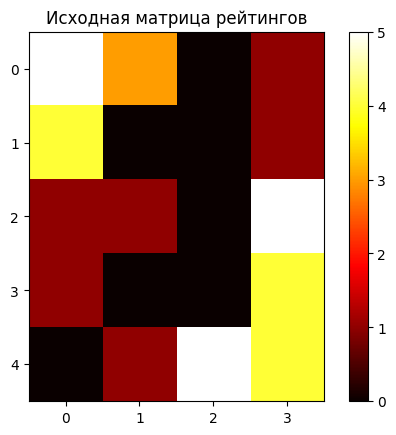

In [42]:
import matplotlib.pyplot as plt
plt.imshow(ratings, cmap='hot', interpolation='nearest')
plt.title("Исходная матрица рейтингов")
plt.colorbar()
plt.show()


Отображаем предсказанную матрицу рейтингов:


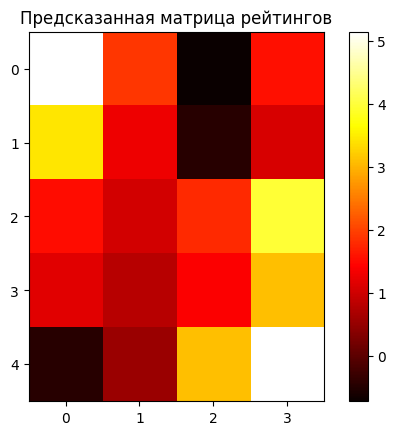

In [43]:
plt.imshow(predicted_ratings, cmap='hot', interpolation='nearest')
plt.title("Предсказанная матрица рейтингов")
plt.colorbar()
plt.show()
